<img src="img/template1.png">
<img src="img/template2.png">

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("img/cat.jpg", 0)
print(img.shape)
template = cv2.imread("img/cat_face.jpg", 0)
print(template.shape)
h, w = template.shape

(433, 650)
(219, 253)


- Aşağıdaki methodlar correlation matrix hesabında kullanılır her biri.

In [3]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(215, 398)


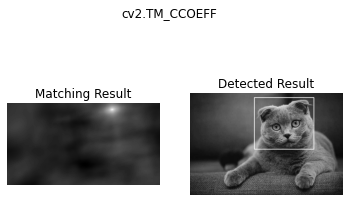

(215, 398)


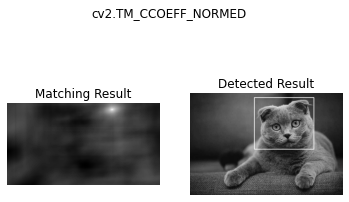

(215, 398)


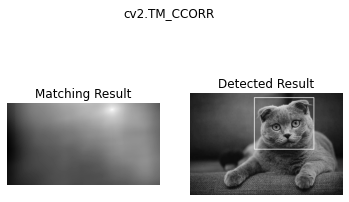

(215, 398)


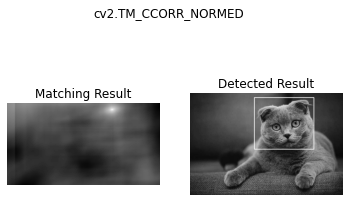

(215, 398)


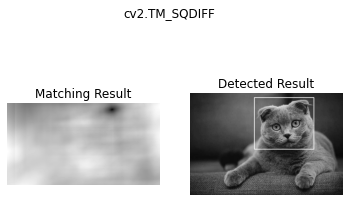

(215, 398)


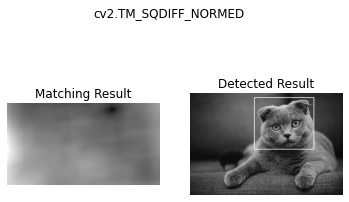

In [4]:
for meth in methods:
      
    method = eval(meth) # 'cv2.TM_CCOEFF' -> cv2.TM_CCOEFF
    
    matchingImg = cv2.matchTemplate(img, template, method)
    print(matchingImg.shape)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matchingImg)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # bu methodlarda min location sol üste karşılık gelir,
    else: # diğer tüm methodlarda max location sol üste karşılık gelir.
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, 255, 2) # draw box
    
    plt.figure()
    plt.subplot(121), plt.imshow(matchingImg, cmap = "gray")
    plt.title("Matching Result"), plt.axis("off")
    plt.subplot(122), plt.imshow(img, cmap = "gray")
    plt.title("Detected Result"), plt.axis("off")
    plt.suptitle(meth)
    
    plt.show()